***

# Plant Growth Data Analysis with t-Test and ANOVA

***

![Plant Growth](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Echinochloa_crusgalli_habit3_-_Flickr_-_Macleay_Grass_Man.jpg/800px-Echinochloa_crusgalli_habit3_-_Flickr_-_Macleay_Grass_Man.jpg)

## Description:

This project involves performing a statistical analysis of plant growth data using Python. The dataset, [PlantGrowth](https://vincentarelbundock.github.io/Rdatasets/), provides information on the weight of plants grown under different conditions (a control group and two experimental groups). The main objectives of the project are:

1. Describe the dataset and conduct a preliminary analysis.
2. Explain the concept of a t-test, its assumptions.
3. Perform a t-test to determine if there are statistically significant differences in plant weight between the two experimental groups (`trt1` and `trt2`).
4. Explain the ANOVA method, its advantages, and its use cases.
5. Perform a one-way Analysis of Variance (ANOVA) to test if there are differences in the mean plant weights across the three groups (`ctrl`, `trt1`, and `trt2`).
6. Discuss why ANOVA is preferable to conducting multiple t-tests when comparing more than two groups.


***

## Description of the dataset 

[Results from an Experiment on Plant Growth(Description)](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html)

> Results from an experiment to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions.
> 
> **Usage**  
> `PlantGrowth`  

> **Format**  
> A data frame of 30 cases on 2 variables:  
> - `[, 1] weight` - Numeric  
> - `[, 2] group` - Factor 
>  
> The levels of the group are: `ctrl`, `trt1`, and `trt2`.  

> **Source**  
> Dobson, A. J. (1983). *An Introduction to Statistical Modelling*. London: Chapman and Hall.



***

## Import libraries 

- [Pandas](https://pandas.pydata.org/docs/)
- [Matplotlib](https://matplotlib.org/stable/contents.html)
- [Statistical functions (scipy.stats)](https://docs.scipy.org/doc/scipy/reference/stats.html)
- [Seaborn: statistical data visualization](https://seaborn.pydata.org/#seaborn-statistical-data-visualization)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, levene, shapiro, f_oneway

## Load data 

In [ ]:
# Load the dataset into a DataFrame.
plant_df = pd.read_csv("./data/PlantGrowth.csv")

# Show.
plant_df

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


## Display summary statistic 

In [ ]:
# Display statistics of 'weight' grouped by 'group'.
plant_df.groupby('group')['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
ctrl,10.0,5.032,0.583091,4.17,4.5500,5.155,5.2925,6.11
trt1,10.0,4.661,0.793676,3.59,4.2075,4.550,4.8700,6.03
trt2,10.0,5.526,0.442573,4.92,5.2675,5.435,5.7350,6.31


### Brief summary of the descriptive statistics for the `weight` variable grouped by treatment groups (`ctrl`, `trt1`, `trt2`):

**`trt2`** has the highest mean weight, followed by the **`ctrl`** group, with **`trt1`** having the lowest mean weight.  
**`trt1`** shows the largest variability in weight, as indicated by its higher standard deviation (0.79), whereas **`trt2`** shows the least variability with a standard deviation of 0.44.  
The spread of weights (range and interquartile range) is narrower in **`trt2`**, suggesting more consistent results within this group.  
These insights provide a good starting point for further statistical analysis, such as ANOVA, to test for significant differences between the groups.


***

## Visualize the data

### Boxplot of `weight` grouped by treatment

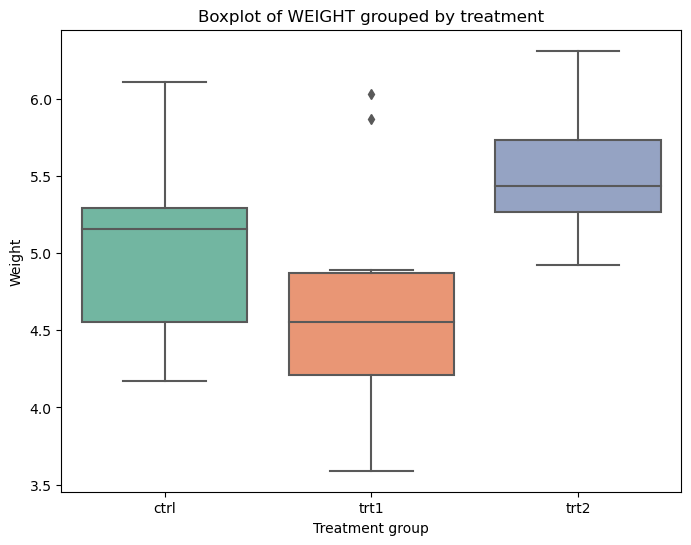

In [ ]:
# Create a figure and axes.
fig, ax = plt.subplots(figsize=(8, 6)) 

# Generate a boxplot of 'weight' by 'group' using Seaborn.
sns.boxplot(x='group', y='weight', data=plant_df, palette='Set2', ax=ax)

# Add title and axis labels.
ax.set_title('Boxplot of WEIGHT grouped by treatment')
ax.set_xlabel('Treatment group')
ax.set_ylabel('Weight');

### Strip plot to show the distribution of `weight`

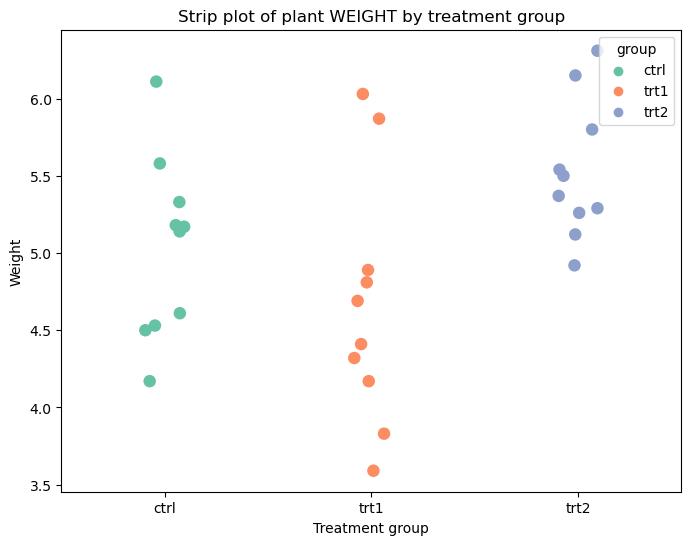

In [ ]:
# Create a figure and axes.
fig, ax = plt.subplots(figsize=(8, 6))

# Generate a strip plot of 'weight' by 'group'.
sns.stripplot(data=plant_df, x='group', y='weight', jitter=True, ax=ax, hue='group', palette='Set2', size=9)

# Add title and axis labels.
ax.set_title('Strip plot of plant WEIGHT by treatment group')
ax.set_xlabel('Treatment group')
ax.set_ylabel('Weight');

### Importance of visualizing data distributions

Creating graphical representations, like boxplots or strip plots, helps us:

1. **Understand Variability**: Shows the range and spread of values within each group.  
2. **Spot Outliers**: Highlights unusual values, such as the two outliers in the `trt1` group, which may affect results.  
3. **Check Distribution**: Gives a quick sense of the shape of the data, like whether it’s symmetric or skewed.  
4. **Validate Assumptions**: Helps assess if the data meets conditions for statistical tests, like normality and equal variances.

These visualizations guide us in identifying potential problems and refining our analysis.


***

## The t-test and its assumptions


The definition of **t-test** (**Student's t-test**) from [WikipediA](https://en.wikipedia.org/wiki/Student%27s_t-test): 

> Student's t-test is a statistical test used to test whether the difference between the response of two groups is statistically significant or not. It is any statistical hypothesis test in which the test statistic follows a Student's t-distribution under the null hypothesis. 

There are different types of t-tests depending on the nature of the data and the relationship between the groups being compared.

1. **Independent Samples T-Test**: Compares means between two independent groups (e.g., `trt1` and `trt2` in this dataset).
2. **Paired Samples T-Test**: Compares means from the same group at different times (e.g., pre-test and post-test).
3. **One-Sample T-Test**: Compares a sample mean to a known value.

Applying **Independent Samples T-Test** the following [assumptions from Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-test#Assumptions) should be met:

1. **Normality**: The data should follow a normal distribution.
2. **Independence**: The observations in each group must be independent.
3. **Homogeneity of Variance**: The variances in the two groups should be approximately equal.

From the [Laerd Statistics: "Independent t-test using SPSS Statistics"](https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php) the assuptions are wider: 

1. **Continuous Dependent Variable**: The dependent variable (e.g., `weight`) must be measured on a continuous scale (interval or ratio level).
2. **Categorical Independent Variable**: The independent variable should have two independent groups (e.g., `trt1` and `trt2` in this dataset).
3. **Independence of Observations**: Observations must be independent, meaning no overlap exists between the groups or their participants.
4. **No Significant Outliers**: The data should not have extreme values that could distort the results. Outliers can be identified and addressed before analysis.
5. **Normality**: The dependent variable should be approximately normally distributed for each group. This can be tested using methods such as the [Shapiro-Wilk test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test).
6. **Homogeneity of Variance**: The variance of the dependent variable should be similar across the two groups. This can be tested using [Levene's test](https://en.wikipedia.org/wiki/Levene%27s_test).



***

## Performing a t-test between `trt1` and `trt2`

We will conduct an independent samples t-test to determine if there is a statistically significant difference in mean weight between `trt1` and `trt2`.

Meeteng the assumptions:

1. The dependent variable weight is continuous, as it represents the weight of plants, which can be measured on a ratio scale.

2. The independent variable group has two categories (`trt1` and `trt2`).

3. It seems to meet third assumption, as the observations from each treatment group (`trt1`, `trt2`) are independent of each other. 

4. Outliers can be checked using boxplots or other methods. Given the dataset's small size, it's important to visually inspect for outliers, which may distort the results.

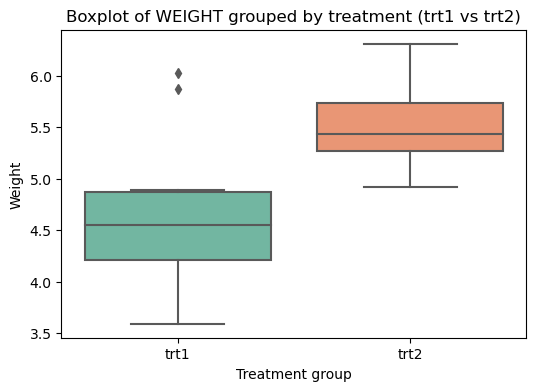

In [6]:
# Filter the data for two groups: trt1 and trt2.
two_groups_df = plant_df[plant_df['group'].isin(['trt1', 'trt2'])]

# Create a boxplot for the two groups.
fig, ax = plt.subplots(figsize=(6, 4)) 
sns.boxplot(x='group', y='weight', data=two_groups_df, palette='Set2', ax=ax)

# Add title and axis labels.
ax.set_title('Boxplot of WEIGHT grouped by treatment (trt1 vs trt2)')
ax.set_xlabel('Treatment group')
ax.set_ylabel('Weight');

There are outliers in the `trt1` treatment group. It looks like they should be saved to see how they affect the result. 

In [7]:
# Extract weights for the two groups.
trt1 = plant_df[plant_df['group'] == 'trt1']['weight']
trt2 = plant_df[plant_df['group'] == 'trt2']['weight']

5. The results of the [**Shapiro-Wilk test**](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) for normality are as follows:
trt1: p-value = 0.452 (no significant departure from normality)
trt2: p-value = 0.564 (no significant departure from normality)
Since the p-values are all greater than 0.05, we fail to reject the null hypothesis of normality, indicating that the data is approximately normally distributed for our two groups.

In [8]:
# Test for normality using Shapiro-Wilk test.
shapiro_trt1 = shapiro(trt1)
shapiro_trt2 = shapiro(trt2)

# Show the results.
print(f"Shapiro-Wilk test for trt1: {shapiro_trt1}")
print(f"Shapiro-Wilk test for trt2: {shapiro_trt2}")

Shapiro-Wilk test for trt1: ShapiroResult(statistic=0.9304108619689941, pvalue=0.451945960521698)
Shapiro-Wilk test for trt2: ShapiroResult(statistic=0.941005289554596, pvalue=0.5642533898353577)


6. The results of [**Levene's test**](https://en.wikipedia.org/wiki/Levene%27s_test) for homogeneity of variance:
p-value = 0.164 (no significant difference in variances across groups)
Since the p-value is greater than 0.05, we fail to reject the null hypothesis of equal variances, meaning the assumption of homogeneity of variance is satisfied.

In [9]:
# Test for equality of variances using Levene's test.
levene_test = levene(trt1, trt2)

# Show the results.
print(f"Levene's test for equality of variances: {levene_test}")

Levene's test for equality of variances: LeveneResult(statistic=2.104177792800407, pvalue=0.1641008315679023)


Finally, perform an independent two-sample t-test using [`scipy.stats.ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) from the `scipy.stats` library, to compare the means of `trt1` and `trt2`. The test determines whether the difference in means between the two groups is statistically significant.

In [10]:
# Perform the t-test.
t_test = ttest_ind(trt1, trt2)

# Show the results. 
print(f"T-Test results: {t_test}")

T-Test results: TtestResult(statistic=-3.0100985421243616, pvalue=0.0075184261182198574, df=18.0)


***

## ANOVA method, its advantages, and its use cases

We analyze the [PlantGrowth](https://vincentarelbundock.github.io/Rdatasets/) dataset to compare the mean plant weights across three treatment groups: `ctrl` (control), `trt1` (treatment 1), and `trt2` (treatment 2). To achieve this, we apply Analysis of Variance (ANOVA).

[ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance) is a statistical method used to test whether the means of multiple groups are significantly different from each other. It evaluates the null hypothesis ($H_0$), which states that all group means are equal.

ANOVA works by comparing two sources of variability in the data:

 - **Between-Group Variance**: Differences between the means of different groups.
 - **Within-Group Variance**: Variability within each individual group.
If the between-group variance is significantly greater than the within-group variance, it suggests that at least one group mean is different, leading to the rejection of the null hypothesis.

**Types of ANOVA**:
 - **One-Way ANOVA**: Tests the effect of a single independent variable (factor) on a dependent variable.
 - **Two-Way ANOVA** (or more): Analyzes the effects of two or more factors simultaneously.

**ANOVA Output**:
 - **F-statistic**: The ratio of between-group variance to within-group variance.
 - **p-value**: If $𝑝 < 0.05$, the null hypothesis is rejected, indicating that at least one group's mean is different.

We apply [**One-Way ANOVA**](https://en.wikipedia.org/wiki/One-way_analysis_of_variance), as we are testing the effect of a single independent variable (`group`) on the dependent variable (`weight`).



***

## Performing ANOVA on `ctrl`, `trt1`, and `trt2`


We will perform a one-way ANOVA to test whether there is a significant difference in mean weight across the three treatment groups.

In [11]:
# Extract weights for the three groups.
ctrl = plant_df[plant_df['group'] == 'ctrl']['weight']
trt1 = plant_df[plant_df['group'] == 'trt1']['weight']
trt2 = plant_df[plant_df['group'] == 'trt2']['weight']

In [12]:
# Perform the ANOVA test.
anova_result = f_oneway(ctrl, trt1, trt2)

# Show the results. 
print(f"ANOVA results: {anova_result}")

ANOVA results: F_onewayResult(statistic=4.846087862380136, pvalue=0.0159099583256229)


***

# END